# Q3_Mortality_in_US_per_States_Comparison

## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the cleaned data frame

In [2]:
df = pd.read_csv("USCDI_Cleaned.csv")
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2019,SD,South Dakota,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,20.2,...,22.2,Overall,Overall,POINT (-100.3735306369997 44.353130053000484),46.0,CAN,CAN05,CRDRATE,OVERALL,OVR
1,2015,2019,TX,Texas,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Crude Rate,2.9,...,3.0,Sex,Female,POINT (-99.42677020599967 31.827240407000488),48.0,CAN,CAN03,CRDRATE,SEX,SEXF
2,2015,2019,VT,Vermont,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,23.0,...,25.5,Overall,Overall,POINT (-72.51764079099962 43.62538123900049),50.0,CAN,CAN05,CRDRATE,OVERALL,OVR
3,2015,2019,WV,West Virginia,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Crude Rate,31.6,...,33.2,Sex,Female,POINT (-80.71264013499967 38.66551020200046),54.0,CAN,CAN02,CRDRATE,SEX,SEXF
4,2015,2019,WI,Wisconsin,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Age-adjusted Rate,444.6,...,447.8,Sex,Female,POINT (-89.81637074199966 44.39319117400049),55.0,CAN,CAN07,AGEADJRATE,SEX,SEXF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36643,2020,2020,US,United States,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,37.3,...,38.7,Race/Ethnicity,"Multiracial, non-Hispanic",NaN,59.0,CVD,CVD09,CRDRATE,RACE,MRC
36644,2020,2020,WV,West Virginia,NVSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease mortalit...,"cases per 100,000",Age-adjusted Rate,NaN,...,NaN,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54.0,COPD,COPD06,AGEADJRATE,RACE,AIAN
36645,2020,2020,TX,Texas,NVSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease mortalit...,"cases per 100,000",Crude Rate,54.1,...,55.8,Age,Age 45-64,POINT (-99.42677020599967 31.827240407000488),48.0,COPD,COPD06,CRDRATE,AGE,AGE4564
36646,2020,2020,WY,Wyoming,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Age-adjusted Rate,30.2,...,35.8,Sex,Female,POINT (-108.10983035299967 43.23554134300048),56.0,CVD,CVD07,AGEADJRATE,SEX,SEXF


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36648 entries, 0 to 36647
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  36648 non-null  int64  
 1   YearEnd                    36648 non-null  int64  
 2   LocationAbbr               36648 non-null  object 
 3   LocationDesc               36648 non-null  object 
 4   DataSource                 36648 non-null  object 
 5   Topic                      36648 non-null  object 
 6   Question                   36648 non-null  object 
 7   DataValueUnit              36648 non-null  object 
 8   DataValueType              36648 non-null  object 
 9   DataValue                  26089 non-null  float64
 10  DataValueAlt               26088 non-null  float64
 11  DataValueFootnoteSymbol    10559 non-null  object 
 12  DataValueFootnote          10559 non-null  object 
 13  LowConfidenceLimit         25984 non-null  flo

In [4]:
df['Topic'].unique()

array(['Cancer', 'Chronic Obstructive Pulmonary Disease', 'Asthma',
       'Diabetes', 'Chronic Kidney Disease', 'Cardiovascular Disease',
       'Alcohol'], dtype=object)

In [5]:
df['LocationDesc'].unique()

array(['South Dakota', 'Texas', 'Vermont', 'West Virginia', 'Wisconsin',
       'Florida', 'Illinois', 'Iowa', 'Kansas', 'Massachusetts',
       'Minnesota', 'Mississippi', 'New Hampshire', 'South Carolina',
       'Wyoming', 'Alaska', 'Delaware', 'Indiana', 'Maine', 'Maryland',
       'Michigan', 'North Carolina', 'North Dakota', 'Oregon',
       'United States', 'Alabama', 'Missouri', 'New Jersey', 'New York',
       'Connecticut', 'Georgia', 'Hawaii', 'Montana', 'New Mexico',
       'Oklahoma', 'Idaho', 'Arkansas', 'Louisiana', 'Kentucky',
       'Arizona', 'California', 'Nebraska', 'Pennsylvania', 'Washington',
       'Nevada', 'Ohio', 'District of Columbia', 'Rhode Island',
       'Colorado', 'Virginia', 'Utah', 'Tennessee', 'Puerto Rico'],
      dtype=object)

In [6]:
df['LocationAbbr'].unique()

array(['SD', 'TX', 'VT', 'WV', 'WI', 'FL', 'IL', 'IA', 'KS', 'MA', 'MN',
       'MS', 'NH', 'SC', 'WY', 'AK', 'DE', 'IN', 'ME', 'MD', 'MI', 'NC',
       'ND', 'OR', 'US', 'AL', 'MO', 'NJ', 'NY', 'CT', 'GA', 'HI', 'MT',
       'NM', 'OK', 'ID', 'AR', 'LA', 'KY', 'AZ', 'CA', 'NE', 'PA', 'WA',
       'NV', 'OH', 'DC', 'RI', 'CO', 'VA', 'UT', 'TN', 'PR'], dtype=object)

In [7]:
# Grouping the number of mortality (DataValue) per topic and state
s = df.groupby(['Topic','LocationAbbr'], as_index=False)['DataValue'].mean()
s

,Topic,LocationAbbr,DataValue
0,Alcohol,AK,25.323077
1,Alcohol,AL,18.235714
2,Alcohol,AR,17.065385
3,Alcohol,AZ,25.355882
4,Alcohol,CA,16.907143
...,...,...,...
360,Diabetes,VT,133.046154
361,Diabetes,WA,66.219149
362,Diabetes,WI,70.167500
363,Diabetes,WV,106.348000


In [8]:
#sorting by data value(Mortality)
df1 = s.sort_values(by= 'DataValue', ascending=False)
df1

,Topic,LocationAbbr,DataValue
253,Chronic Kidney Disease,US,65867.75
213,Chronic Kidney Disease,CA,8485.40
252,Chronic Kidney Disease,TX,6768.15
218,Chronic Kidney Disease,FL,4764.30
243,Chronic Kidney Disease,NY,4206.75
...,...,...,...
91,Asthma,RI,NaN
93,Asthma,SD,NaN
99,Asthma,VT,NaN
102,Asthma,WV,NaN


In [9]:
df1.columns

Index(['Topic', 'LocationAbbr', 'DataValue'], dtype='object')

In [10]:
#Keeping only the top cause per state
top_causes = df1.drop_duplicates(subset='LocationAbbr')
top_causes

,Topic,LocationAbbr,DataValue
253,Chronic Kidney Disease,US,65867.750000
213,Chronic Kidney Disease,CA,8485.400000
252,Chronic Kidney Disease,TX,6768.150000
218,Chronic Kidney Disease,FL,4764.300000
243,Chronic Kidney Disease,NY,4206.750000
223,Chronic Kidney Disease,IL,2962.800000
219,Chronic Kidney Disease,GA,2689.900000
244,Chronic Kidney Disease,OH,2673.400000
247,Chronic Kidney Disease,PA,2637.450000
236,Chronic Kidney Disease,NC,2357.300000


In [11]:
top_causes = top_causes.drop(253)
top_causes

,Topic,LocationAbbr,DataValue
213,Chronic Kidney Disease,CA,8485.400000
252,Chronic Kidney Disease,TX,6768.150000
218,Chronic Kidney Disease,FL,4764.300000
243,Chronic Kidney Disease,NY,4206.750000
223,Chronic Kidney Disease,IL,2962.800000
219,Chronic Kidney Disease,GA,2689.900000
244,Chronic Kidney Disease,OH,2673.400000
247,Chronic Kidney Disease,PA,2637.450000
236,Chronic Kidney Disease,NC,2357.300000
231,Chronic Kidney Disease,MI,2168.500000


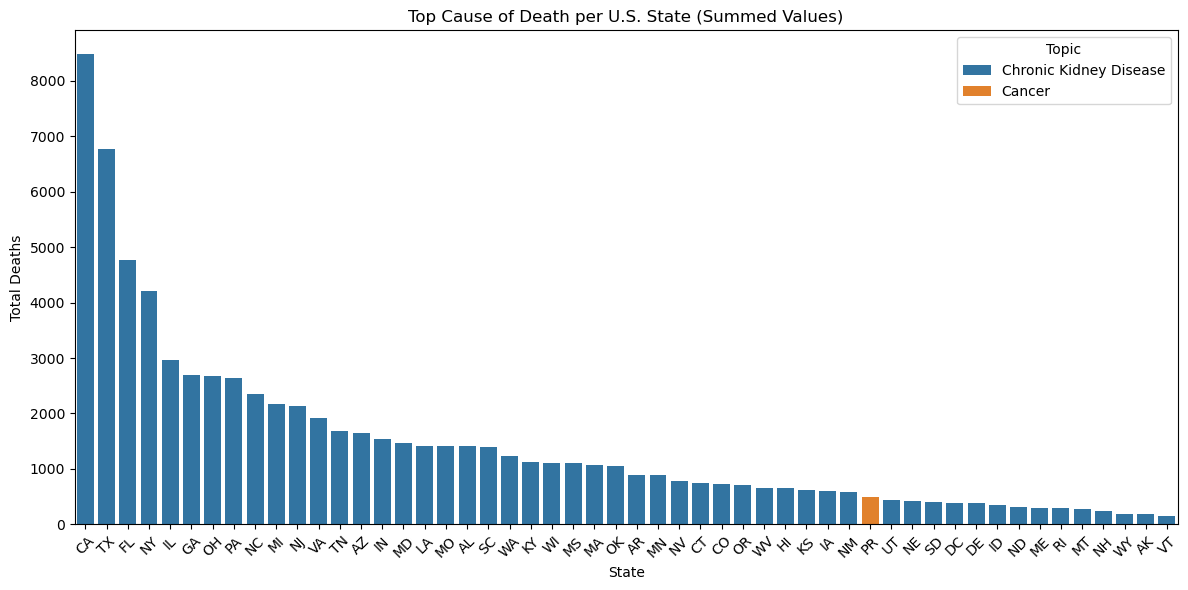

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_causes, x='LocationAbbr', y='DataValue', hue='Topic')

plt.title('Top Cause of Death per U.S. State (Summed Values)')
plt.ylabel('Total Deaths')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# reseting the index and saving the top causes as a csv file

In [14]:
top_causes1 = top_causes.reset_index()
top_causes1 = top_causes1.drop(columns ='index')
top_causes1

,Topic,LocationAbbr,DataValue
0,Chronic Kidney Disease,CA,8485.400000
1,Chronic Kidney Disease,TX,6768.150000
2,Chronic Kidney Disease,FL,4764.300000
3,Chronic Kidney Disease,NY,4206.750000
4,Chronic Kidney Disease,IL,2962.800000
5,Chronic Kidney Disease,GA,2689.900000
6,Chronic Kidney Disease,OH,2673.400000
7,Chronic Kidney Disease,PA,2637.450000
8,Chronic Kidney Disease,NC,2357.300000
9,Chronic Kidney Disease,MI,2168.500000


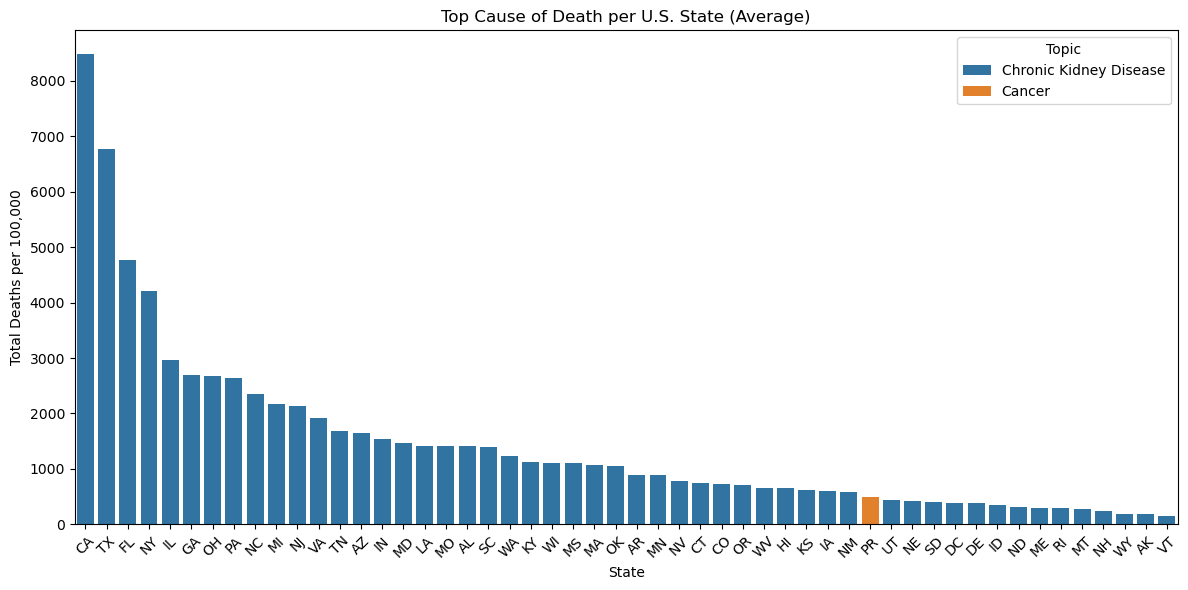

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_causes1, x='LocationAbbr', y='DataValue', hue='Topic')

plt.title('Top Cause of Death per U.S. State (Average)')
plt.ylabel('Total Deaths per 100,000')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
#mortality stats per 100,000

stats = top_causes1.groupby('Topic')['DataValue'].agg(['sum', 'min', 'max', 'median', 'mean']).reset_index()
stats

,Topic,sum,min,max,median,mean
0,Cancer,494.983333,494.983333,494.983333,494.983333,494.983333
1,Chronic Kidney Disease,74646.500000,154.350000,8485.400000,1049.700000,1463.656863


In [17]:
#saving the new data frame
top_causes1.to_csv('Top_Cause_of_Death_per_U.S._State.csv', index=False)